# <div align='center'>初探:感知机</div>

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np

In [2]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (5,9)
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

感知机灵感

```
#####################################################################################
# <codecell>
#####################################################################################
#                      ╱
#                    ╲╱
#                     ╲ ╱                                神经末梢
#          │           ╳                             ╲ /
#         ─┘╲         ╱                               ╳
#      ╳  ╱  ╲       ╱                                 ╲
#     ╱ ╲╱    ╲     ╱                                   ╳
#       ╱        *******                               ╱     ╳
#             ***       ***  轴突:转出信号到其他神经元╱     ╱ ╲
#             *   细胞核  * ══════════════════════════╲  ╳ ╱
#          ╳  ***       ***                            ╲╱ ╳
#         ╱ ╲  ╱ *******                                ╲     ╱
#     ╲  ╱   ╲╱                                          ╲   ╳
#      ╲╱    ╱                                            ╲ ╱ ╲
#      ╱    ╳                                              ╳   ╲
#          ╱ ╲
#             ╲ 树突: 接收信号
#                                            生物神经元
#
#######################################################################################
#
#
#                                    单层感知机
#                     x1  ╲
#                          ╲
#                           ╲
#                         w1 ╲       *********
#                             ╲    **         **
#                              v **             **
#                      w2       *                 *   f(z) = sign(z)
#               x2 ──────────> *  sum(w_i*x_i +b) *  ────────────────> y
#           树突                *                 *   轴突, 激活函数
#                              ^ **     z       **
#                             ╱    **         **
#                         w3 ╱       *********   b: 细胞本身自带的信号, bias偏置值
#                           ╱                    w: 输入信号有选择的接收
#                          ╱                        如果所有w=1, 输入信号全部进入
#                     x3  ╱                         如果所有w=0, 输入信号全部屏蔽
#                                                   如果w=?, 对信号有不同程度的作用
#
#######################################################################################
```

In [3]:
#####################################################################################
# <codecell> 单样本量
#####################################################################################

X = np.array([[1, 0, -1]]) # shape: (1, 3)
W = np.array([[-5], [0], [1]])  # shape: (3, 1)

# W最后一个值是bias(偏置)

lr = 1 # 学习率
target = 1 # 真实值

for i in range(150):
    print('%d:' % i, W)
    y = np.sign(np.dot(X, W)) # 激活函数
    if y != target:
        # 更新W值
        W = W + lr * (target - y) * X.T
    else:
        print('finished')
        break

0: [[-5]
 [ 0]
 [ 1]]
1: [[-3]
 [ 0]
 [-1]]
2: [[-1]
 [ 0]
 [-3]]
finished


In [4]:
#####################################################################################
# <codecell> 多个样本量
#####################################################################################

X = np.array([
    [1, 1, 1],
    [1, 1, 3],
    [1, 2, 1],
    [1, 2, 4],
    [1, 3, 2],
    [1, 1.5, 5]])

print(X[:, 0]) # this is bias

W = np.array([[3], [0], [1]]) # start values, the first elem is bias

Y = np.array([[1], [1], [1], [-1], [-1], [-1]])

def calculate_params(X, Y, W):
    m = len(X)
    lr = 0.05

    for i in range(1000):
        if i % 10 == 0:
            print('%d\n' % i, W)
        y = np.sign(np.dot(X, W))
        if (y != Y).any(): # 如果模型计算的y和已知标签Y的值不一致,更新参数
            W = W - lr * np.matmul(X.T, (y-Y)) / m # 矩阵计算, m是样本量
        else:
            print('finished')
            break

    # 模拟数据, 在平面中显示这条切线
    xs = np.random.uniform(0, 4, 100)
    ys = (-W[0] - xs*W[1]) / W[2]
    return xs, ys

[1. 1. 1. 1. 1. 1.]


0
 [[3]
 [0]
 [1]]
finished


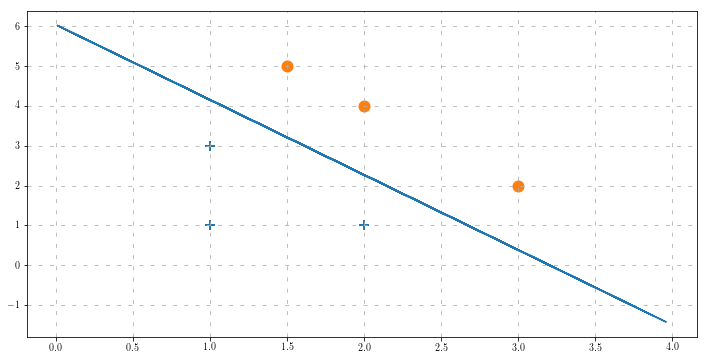

In [5]:
#####################################################################################
# <codecell> plot
#####################################################################################

xs, ys = calculate_params(X, Y, W)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(xs, ys)

# xs = X[:, 1]
# ys = X[:, 2]

xs1 = []
ys1 = []

xs2 = []
ys2 = []

for i, v in enumerate(Y.reshape((len(Y), ))):
    if v > 0:
        xs1.append(X[i][1])
        ys1.append(X[i][2])
    else:
        xs2.append(X[i][1])
        ys2.append(X[i][2])


ax.scatter(xs1, ys1, s=100, lw=2, marker='+')
ax.scatter(xs2, ys2, s=100, lw=2, marker='o')

0
 [[3]
 [0]
 [1]]
10
 [[ 2.64285714]
 [-0.75714286]
 [-0.36      ]]
finished


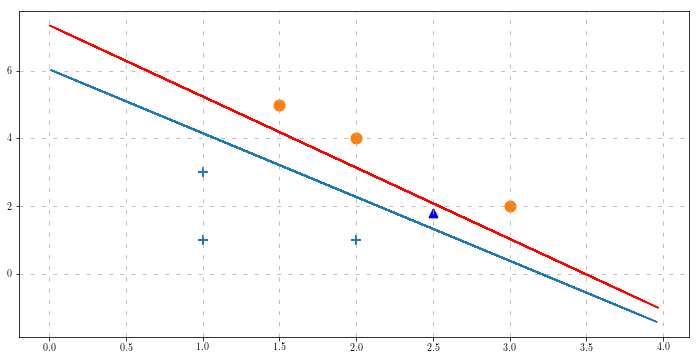

In [6]:
#####################################################################################
# <codecell> add one point
#####################################################################################

fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.plot(xs, ys)
ax.scatter(xs1, ys1, s=100, lw=2, marker='+')
ax.scatter(xs2, ys2, s=100, lw=2, marker='o')

# 添加一个样本
X = np.vstack((X, [[1, 2.5, 1.8]]))
Y = np.vstack((Y, [[1]]))

xs, ys = calculate_params(X, Y, W)
ax.plot(xs, ys, color='red')
ax.scatter(X[-1][1], X[-1][2], s=60, lw=2, marker='^', color='blue')